# Ford Gobike Data Analysis
## by Mohamed Abuelmaaref

## Preliminary Wrangling

> The dataset that I am doing analysis on is Ford GoBike dataset about trips recordings of year 2019 february month.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#discovering  if data has nulls and taking an overlook over the dataser properties
print(df.info(), '\n \n \n')
print(df.isnull().sum(), '\n \n \n')
print(df.duplicated().sum(),'\n \n \n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#dropping rows with nulls
df = df.dropna()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [5]:
#changing data type for start_time and end_time columns to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
#creating column for start of trip hour
df['start_time_hour']= df['start_time'].dt.hour
#creating column for start of trip day
df['start_time_dayofw']= df['start_time'].dt.strftime('%a')
#creating column for start of trip day of year number
df['start_time_dayofy']= df['start_time'].dt.dayofyear
#creating column for end of trip day of year number
df['end_time_dayofy'] = df['end_time'].dt.dayofyear
#creating column for user age
df['age'] = 2019 - df['member_birth_year'].astype(int)
#changing data type of user_type and member_gender to category
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
#calculating the days of rent
df['days_of_rent'] = df['end_time_dayofy'] - df['start_time_dayofy']
#creating a column for duration of trips in minuts
df['duration_min'] = df['duration_sec']/60
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There are 183215 entries of data collected from trips of users of ford go bikes with 16 features which are: 

duration of the trip features: duration_sec, start_time, end_time
information about the station: start_station_id, start_station_name, start_station_latitude, start_station_longitude,                                          end_station_id, end_station_name, end_station_latitude, end_station_longitude
member info                  : bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip


> After clearing null values data went down to 174952 entries And I added 7 features derived from dataset for analysis:

trip info   : start_time_hour, start_time_dayofw, start_time_dayofy, end_time_dayofy, days_of_rent, duration_min

member info : age

### What is/are the main feature(s) of interest in your dataset?

> I am interested in exploring trips' duration, gender, user type, age, and day of week days effect on the trip's number per day since these features might have a huge reflection on it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start date, duration, age, gender and user type would support my investigation.

## Univariate Exploration

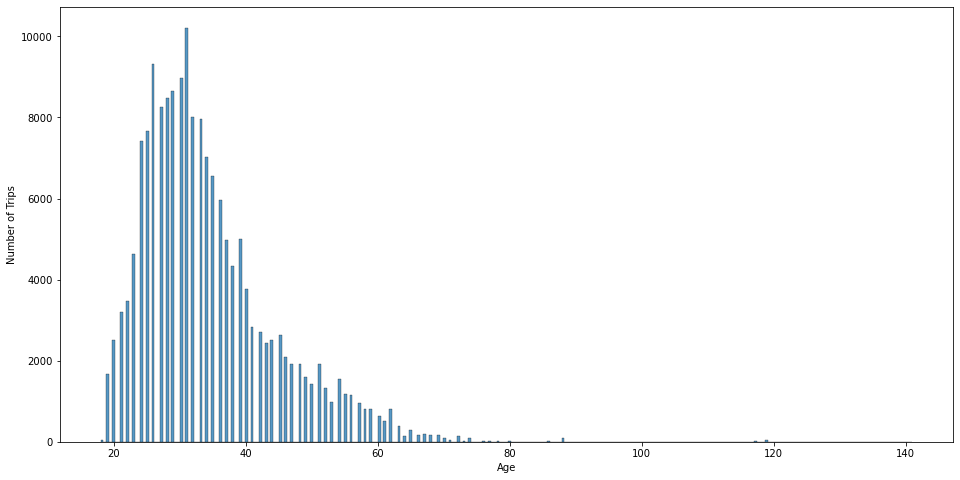

In [6]:
plt.figure(figsize=(16, 8))
sb.histplot(data=df, x="age")
plt.xlabel('Age');
plt.ylabel('Number of Trips');

In [7]:
#to see a describtion of age column
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [8]:
#to see the 99% point to data on the number line.
df['age'].describe(percentiles=[.99])

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: age, dtype: float64

In [9]:
#to check the number of entries of age more than 64.
df[df["age"] > 64].count()[0]

1680

In [10]:
#to drop all the columns of age more than 64.
df = df[df["age"] < 65]

>As we can see above age has values up to 141 which is not realistic.
>To fix this as we can see above 99% of the ages are below 65 years old, so I dropped all values apove it since the number of entries with age above 64 is not huge.
>The mean of ages is 34 and more than half the gobike users go below 39 years old.

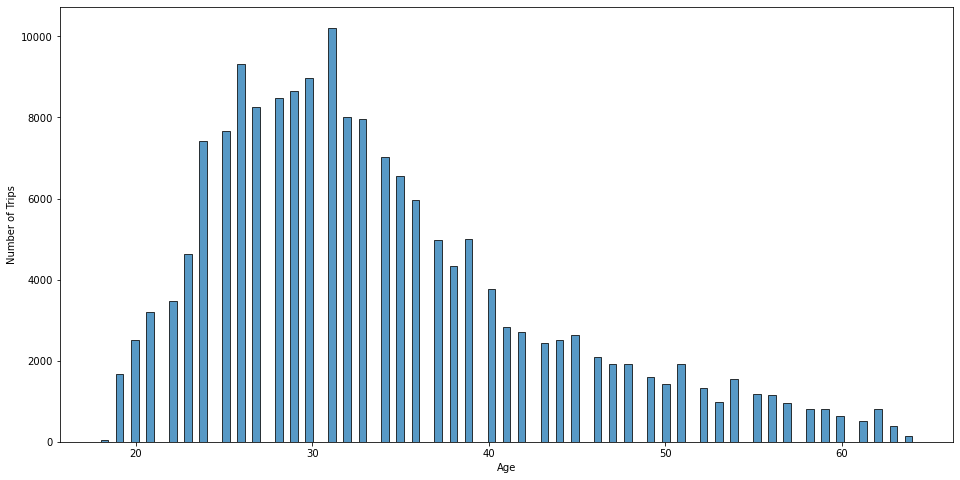

In [11]:
plt.figure(figsize=(16, 8))
sb.histplot(data=df, x="age")
plt.xlabel('Age');
plt.ylabel('Number of Trips');

> Now, as we can see the diagram is more readable and realistic.

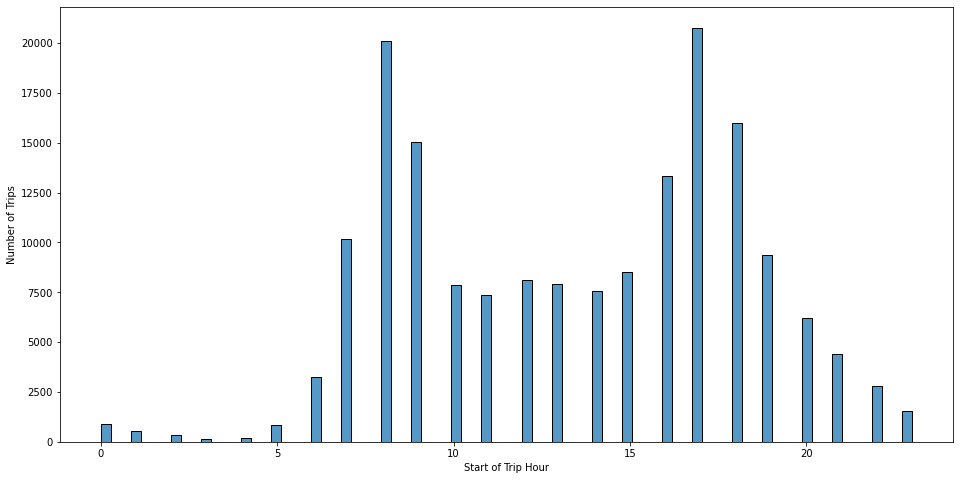

In [12]:
plt.figure(figsize=(16, 8))
sb.histplot(data=df, x="start_time_hour")
plt.xlabel('Start of Trip Hour');
plt.ylabel('Number of Trips');

> As we can see from the diagram above the number of trips starts to rise up at 7Am at the morning till 10AM and then droppes down a little pit then it goes up from 4PM to 7PM and them droppes down slowly till midnighet.

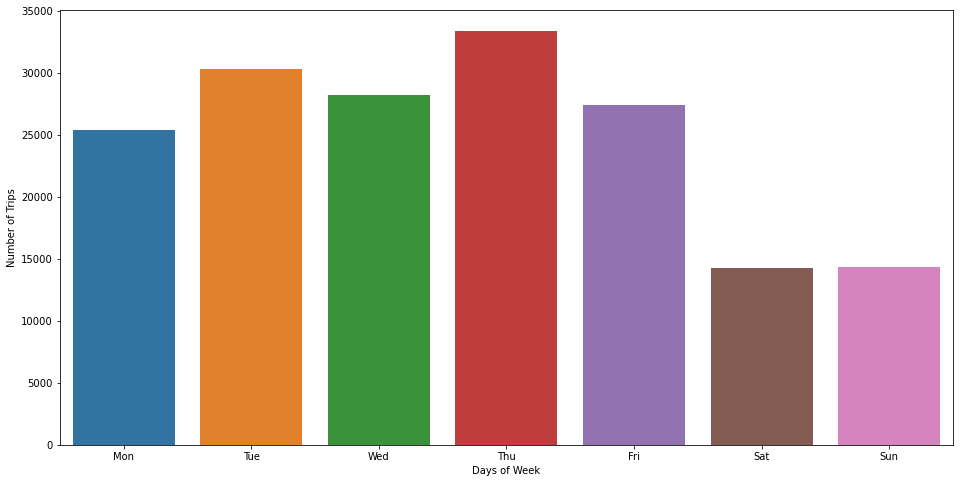

In [13]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="start_time_dayofw", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel('Days of Week');
plt.ylabel('Number of Trips');

> As we can see apove the number of trips goes down in weekends(sat, sun).

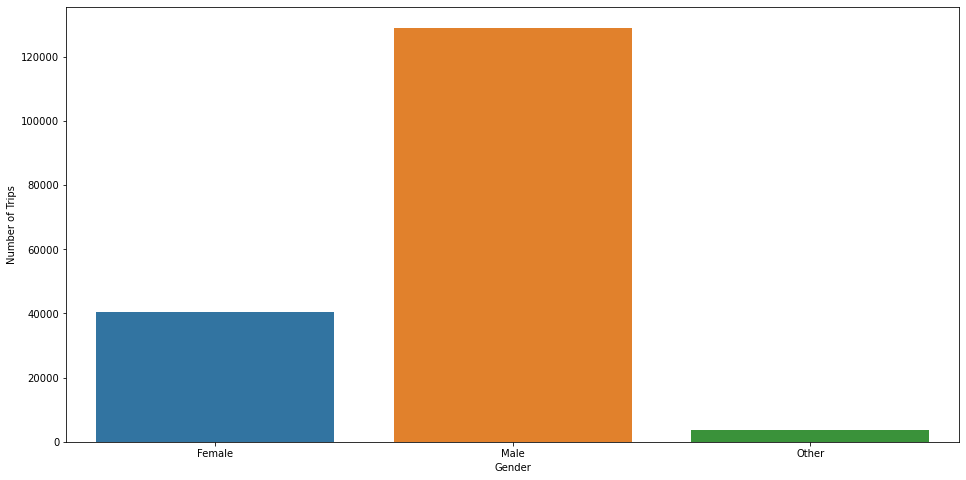

In [14]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="member_gender")
plt.xlabel('Gender');
plt.ylabel('Number of Trips');

>As we can see above most of the users are Males.

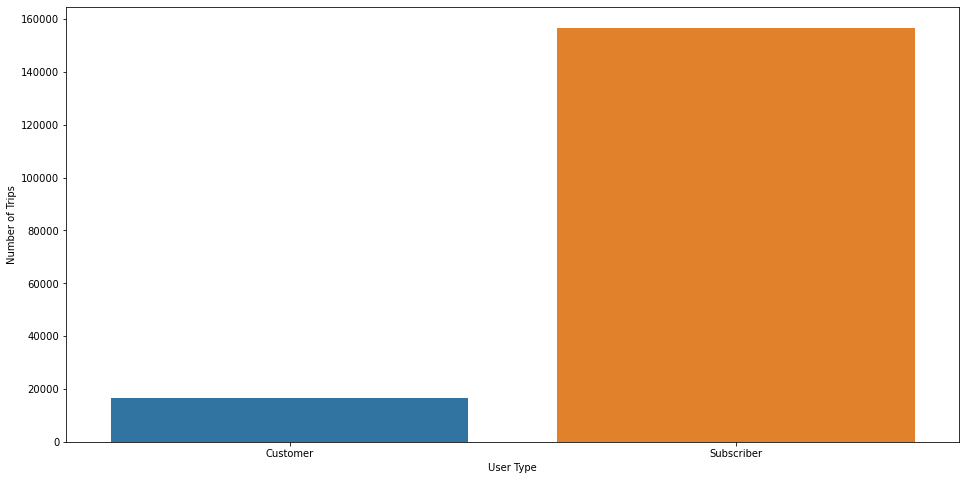

In [15]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="user_type")
plt.xlabel('User Type');
plt.ylabel('Number of Trips');

> As we can see apove most of users are subscribers.

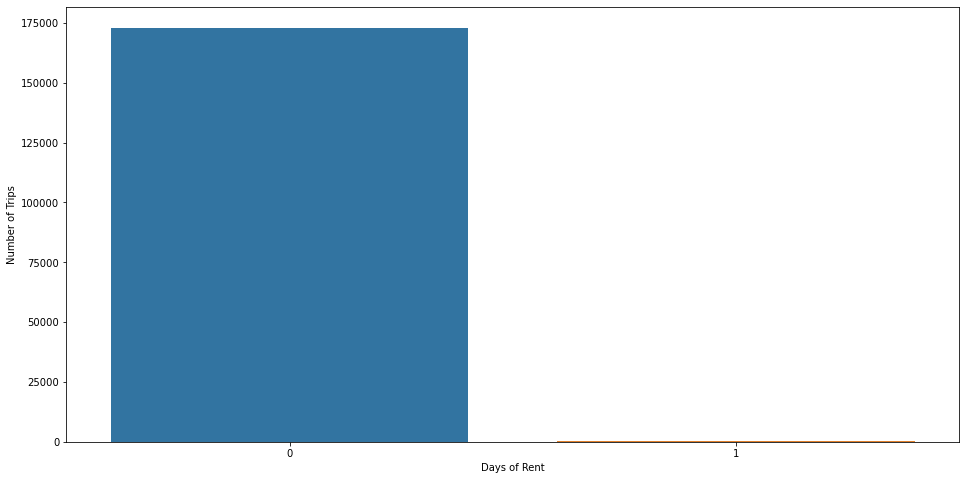

In [16]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="days_of_rent")
plt.xlabel('Days of Rent');
plt.ylabel('Number of Trips');

In [17]:
#The number of users rented the bike after one day.
df[df["days_of_rent"] == 1].count()[0]

283

> As we can see apove only 283 returned the bike The next day.

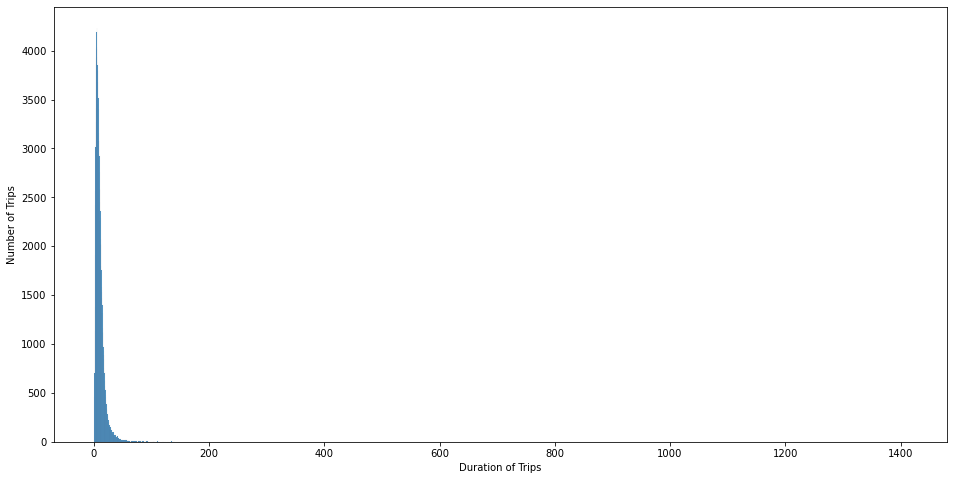

In [18]:
plt.figure(figsize=(16, 8))
sb.histplot(data=df, x="duration_min")
plt.xlabel('Duration of Trips');
plt.ylabel('Number of Trips');

In [19]:
#To see the duration at 99% point
df['duration_min'].describe(percentiles=[.99])

count    173272.000000
mean         11.731309
std          27.455094
min           1.016667
50%           8.500000
99%          52.921500
max        1409.133333
Name: duration_min, dtype: float64

In [20]:
#only 1373 go more than one hour
df[df["duration_min"] > 60].count()[0]

1373

In [21]:
#dropping all data for trips over one hour
df = df[df["duration_min"] <= 60]

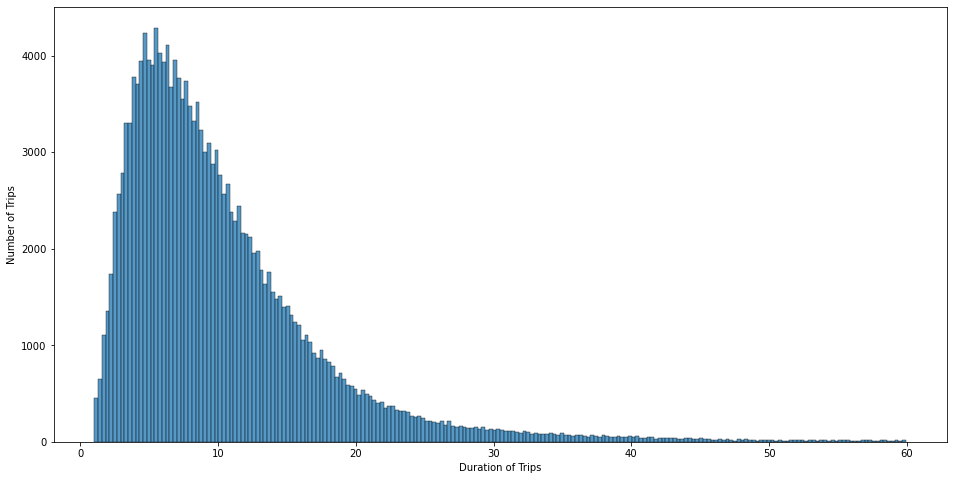

In [22]:
plt.figure(figsize=(16, 8))
sb.histplot(data=df, x="duration_min")
plt.xlabel('Duration of Trips');
plt.ylabel('Number of Trips');

> As we can see apove 99% of the trips Do not go apove one hour so I have dropped the data for trips over one hour. 50% of trips go below 10 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Not a point by itself , but changed the time from secounds to minutes wich showed more in the distrepution that 99% go below one hour and in ages also points go up to 140.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the duration and age distributions I have dropped all the valuse that after the 99% point at the numbers line because the go over realistic numbers and in case of the duration might effect the overall look and statistical calculations of the feature.

## Bivariate Exploration

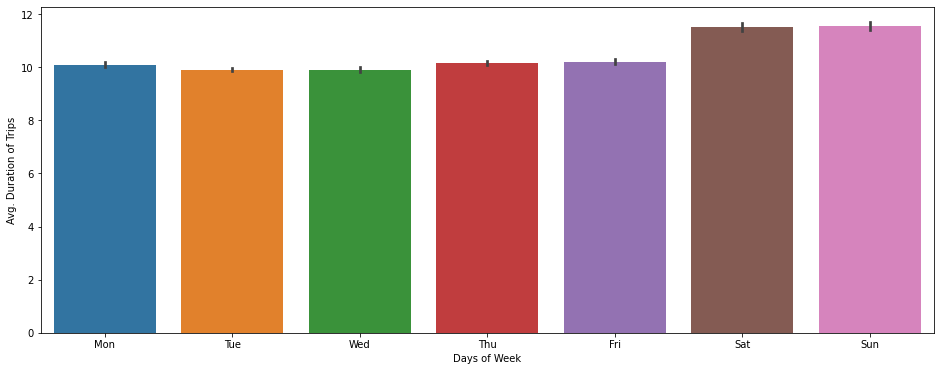

In [23]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'start_time_dayofw', y = 'duration_min', order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel('Days of Week');
plt.ylabel('Avg. Duration of Trips');

> As we can see above the trips duration in weekends are higher than the rest of the days.

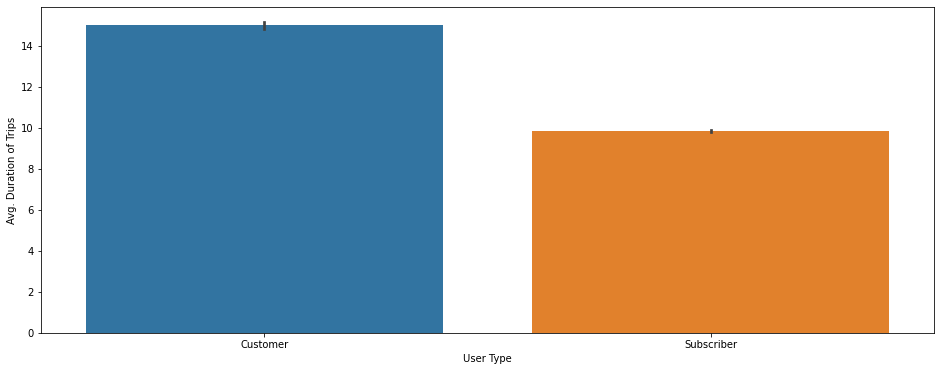

In [24]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'user_type', y = 'duration_min')
plt.xlabel('User Type');
plt.ylabel('Avg. Duration of Trips');

> As we can see above customers tend to rent the bike for more time than subscribers.

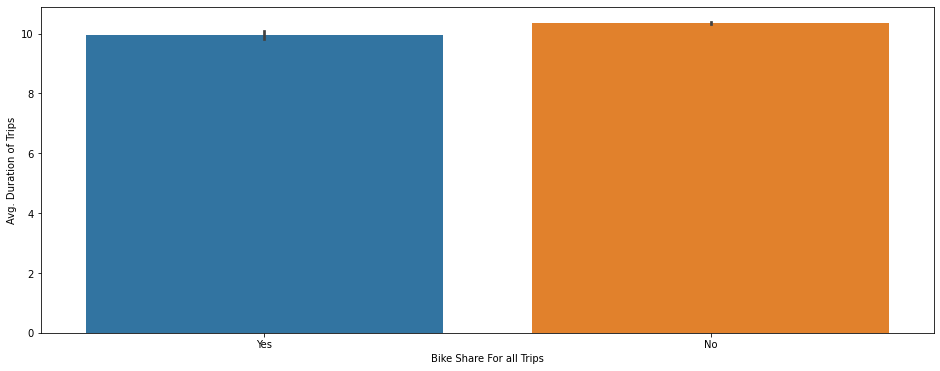

In [25]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'bike_share_for_all_trip', y = 'duration_min')
plt.xlabel('Bike Share For all Trips');
plt.ylabel('Avg. Duration of Trips');

> As we can see above users that does not use the service for all trips tend to spend more time renting the bikes.

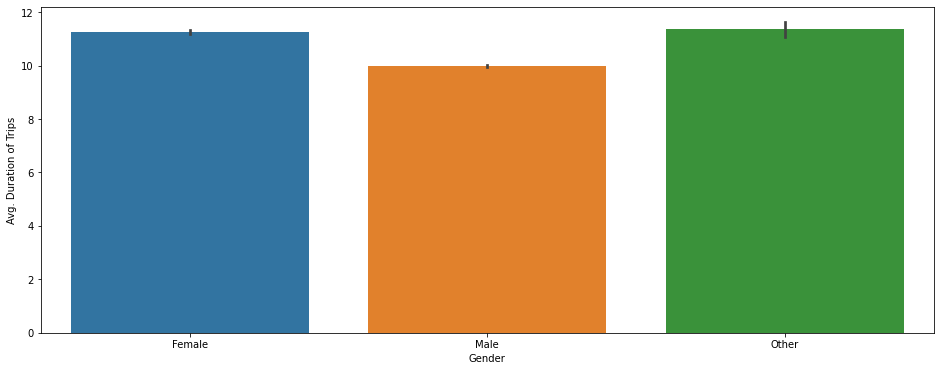

In [26]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'member_gender', y = 'duration_min')
plt.xlabel('Gender');
plt.ylabel('Avg. Duration of Trips');

> As we can see above users with "Other" gender spend more time in trips.

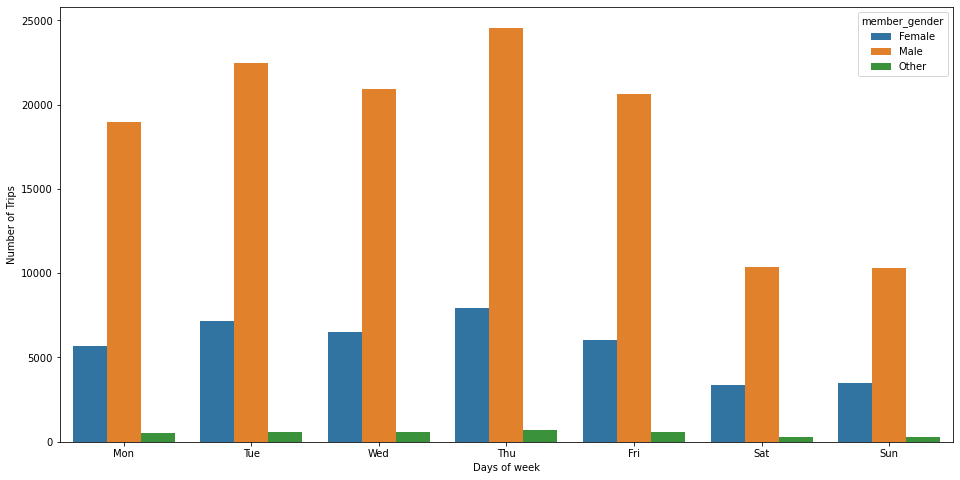

In [27]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="start_time_dayofw", hue ="member_gender", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel('Days of week');
plt.ylabel('Number of Trips');

> As we can see apove gender distribution over each day is close to the same over everyday.

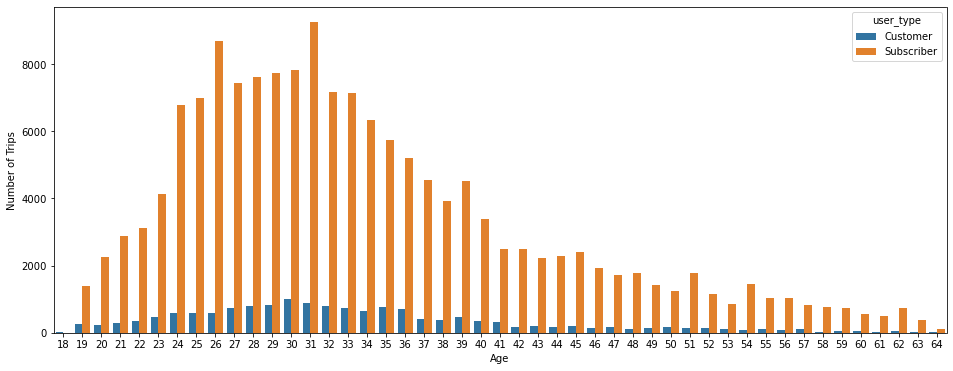

In [28]:
plt.figure(figsize=(16, 6))
sb.countplot(data=df , x = 'age', hue ="user_type")
plt.xlabel('Age');
plt.ylabel('Number of Trips');

> As we can see apove user type distribution over each day is close to the same over Age.

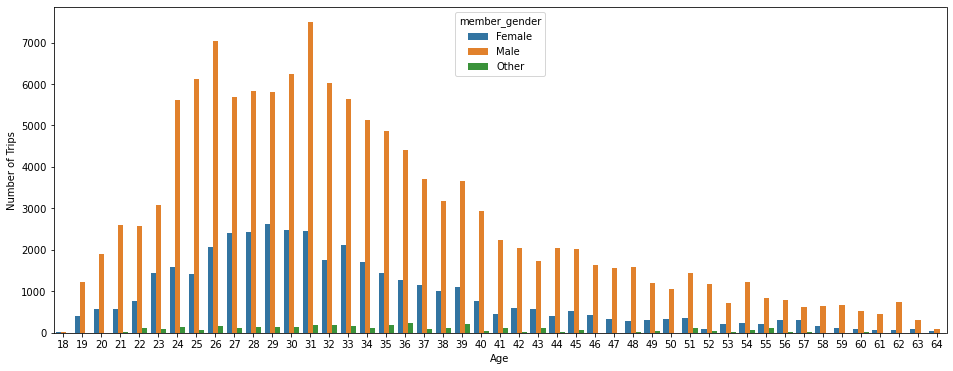

In [29]:
plt.figure(figsize=(16, 6))
sb.countplot(data=df , x = 'age', hue ="member_gender")
plt.xlabel('Age');
plt.ylabel('Number of Trips');

> As we can see apove gender distribution over each day is not the same over Age. But also people below the age of 21 has nearly non "other" gender.

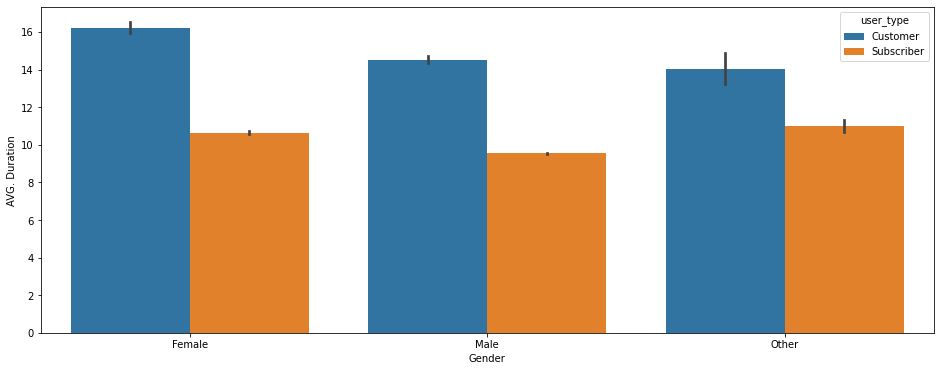

In [30]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'member_gender', y = 'duration_min', hue ="user_type")
plt.xlabel('Gender');
plt.ylabel('AVG. Duration');

> At all cases of gender customers are below the number of subscribers.

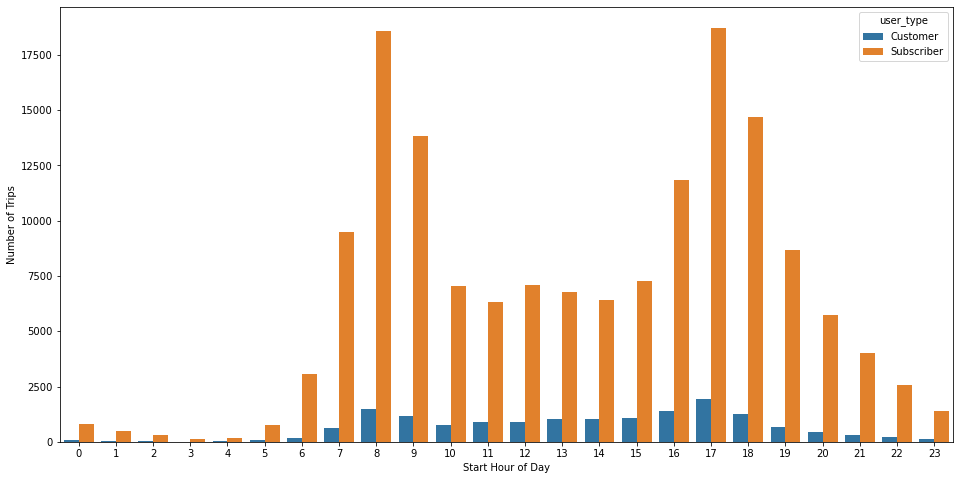

In [31]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="start_time_hour", hue ="user_type")
plt.xlabel('Start Hour of Day');
plt.ylabel('Number of Trips');

> As we can see the The number of customer goes down in the late time of night and early at the morning.

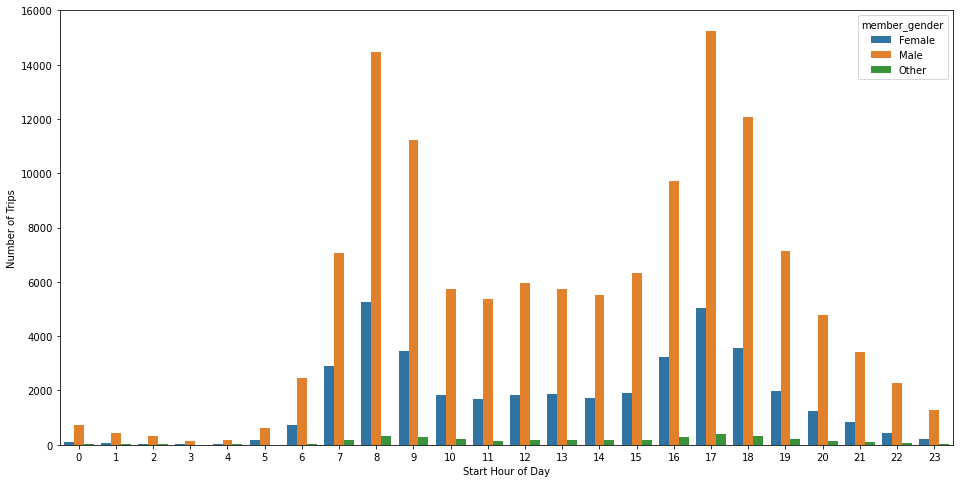

In [32]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="start_time_hour", hue ="member_gender")
plt.xlabel('Start Hour of Day');
plt.ylabel('Number of Trips');

> As we can see the distribution of genders are the same over each hour of the day as the normal distribution of genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The avg duration in the weekends are higher than normal days which is normal while the number of trips are less in weekends, Other gender and people that does not use the service for all trips tend to spend more time in trips. people in the range of age 24-34 are the majority of users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Bike share for all trips, people that said no spend more time in trips.

## Multivariate Exploration

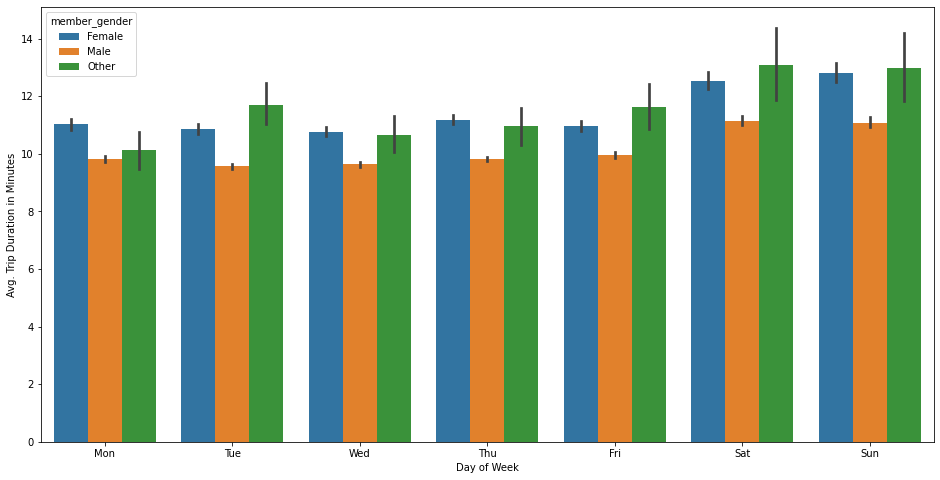

In [33]:
plt.figure(figsize=(16, 8))
sb.barplot(data=df, x="start_time_dayofw", y = 'duration_min', hue ="member_gender", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minutes');

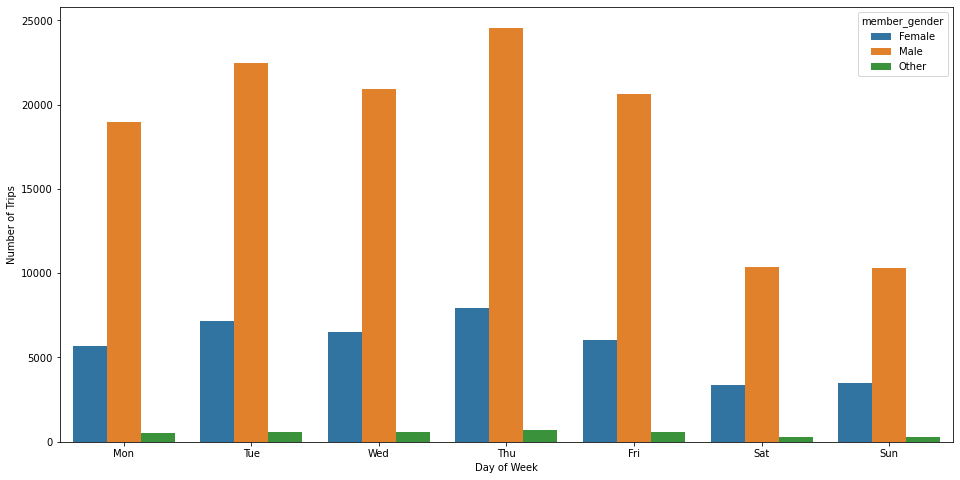

In [34]:
plt.figure(figsize=(16, 8))
sb.countplot(data=df, x="start_time_dayofw", hue ="member_gender", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel('Day of Week');
plt.ylabel('Number of Trips');

> Females and others genders tend to spend more time in trips than males. While males have the highest trip numbers.

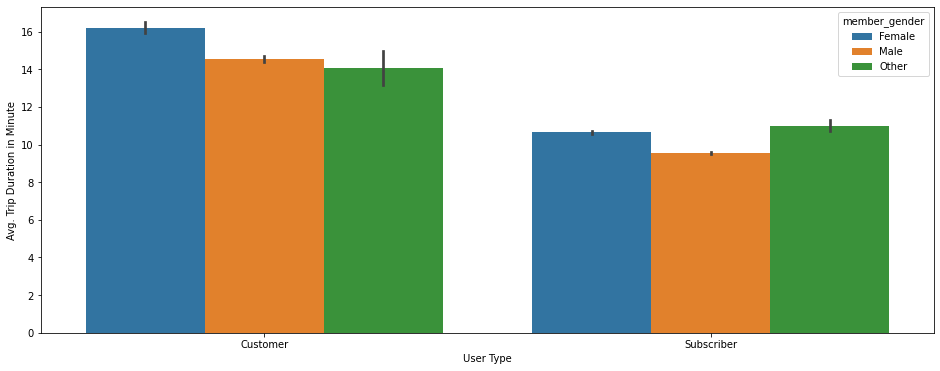

In [35]:
plt.figure(figsize=(16, 6))
sb.barplot(data=df , x = 'user_type', y = 'duration_min', hue ="member_gender")
plt.xlabel('User Type');
plt.ylabel('Avg. Trip Duration in Minute');

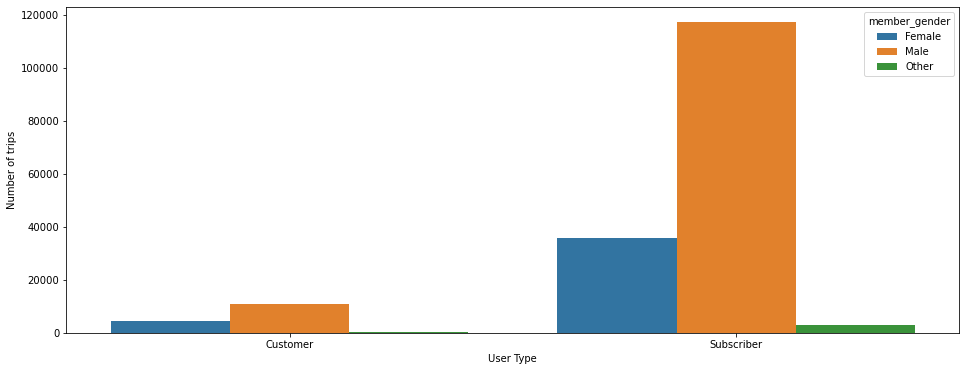

In [36]:
plt.figure(figsize=(16, 6))
sb.countplot(data=df , x = 'user_type', hue ="member_gender")
plt.xlabel('User Type');
plt.ylabel('Number of trips');

> females in customer type tend to spend more time in trips while in subscriber type others gender spend more time. While males have the highest number of trips.

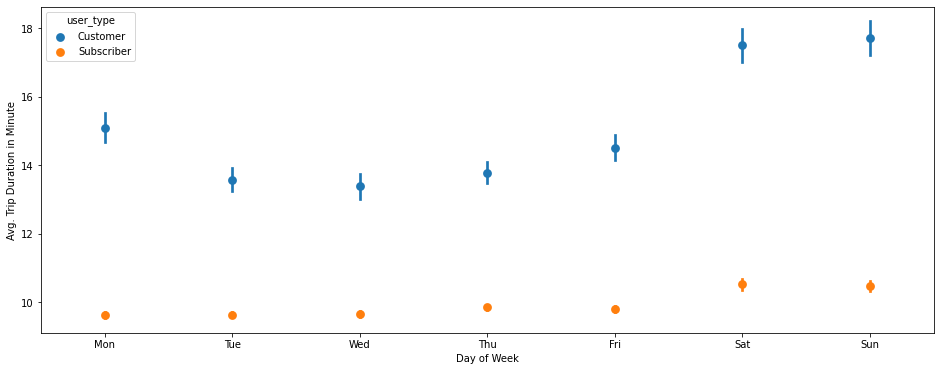

In [37]:
plt.figure(figsize=(16, 6))
sb.pointplot(data=df, x='start_time_dayofw', y='duration_min', hue='user_type', linestyles="", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> Subscribers tend to spend less time in trips over all the days of the week while on the other hand customers spend more time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The number of trips by males is more than females and other gender in the comparson of categories of the user type and days of week but on the other hand males spend less AVG time in trips than the other two gender categories. Subscribers spend less AVG time in trips than customers which also take more trips than subscribers.

### Were there any interesting or surprising interactions between features?

> The interaction between features supplement each other and makes sense when looked at them all combined, Since males tend to spend less time than females and females spend more time in trips. More data about females and other genders might explain the behavior since there are less females and other genders entries than males.